<a href="https://colab.research.google.com/github/Allanizepi/Analise_Exploratoria_Dataset-Titanic/blob/main/Analise_Descritiva_Preditiva_Saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelagem Descritiva e Preditiva de Fatores Relacionados à Saúde do Sono, Estilos de Vida e Obesidade**

O desenvolvimento de sobrepeso e obesidade está significativamente associado a um conjunto de fatores do estilo de vida, que incluem a duração e qualidade do sono, os níveis de estresse, a atividade física diária (como a contagem de passos) e a frequência cardíaca.



O objetivo das análises é demonstrar o impacto dos hábitos de sono e dos estilos de vida sobre o peso corporal das pessoas.

E desenvolver um modelo de aprendizado de máquina capaz de prever a categoria de peso de um indivíduo a partir de seus atributos.

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Foi importado Dataset do site: https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns

In [253]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


Foram extraídas informações do dataset para facilitar a compreensão dos dados, incluindo parâmetros estatísticos, tipos de variáveis e número de registros.

In [254]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Foram elaborados gráficos para investigar se as variáveis Duração do Sono (Sleep Duration), Qualidade do Sono (Quality of Sleep), Nível de Estresse (Stress Level), Frequência Cardíaca (Heart Rate) e Passos Diários (Daily Steps) influenciam a classificação de peso.

<Axes: xlabel='BMI Category', ylabel='Sleep Duration'>

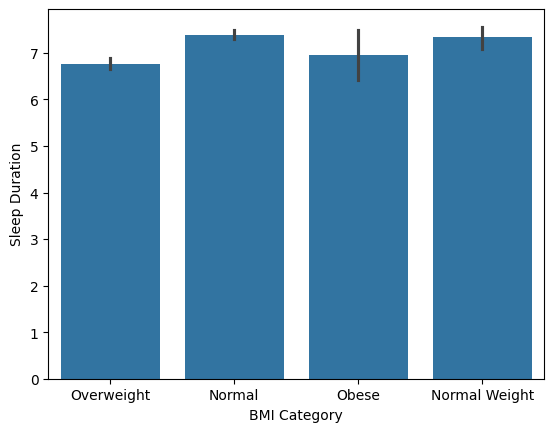

In [256]:
sns.barplot(x='BMI Category', y='Sleep Duration', data=df)

<Axes: xlabel='BMI Category', ylabel='Quality of Sleep'>

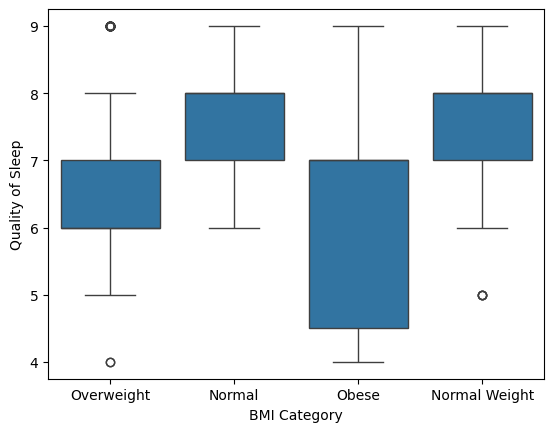

In [257]:
sns.boxplot(x='BMI Category', y='Quality of Sleep',data=df)

<Axes: xlabel='BMI Category', ylabel='Stress Level'>

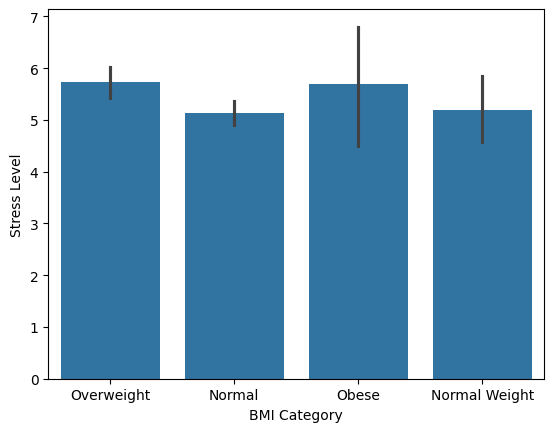

In [258]:
sns.barplot(x='BMI Category',y='Stress Level',data=df)


<Axes: xlabel='BMI Category', ylabel='Heart Rate'>

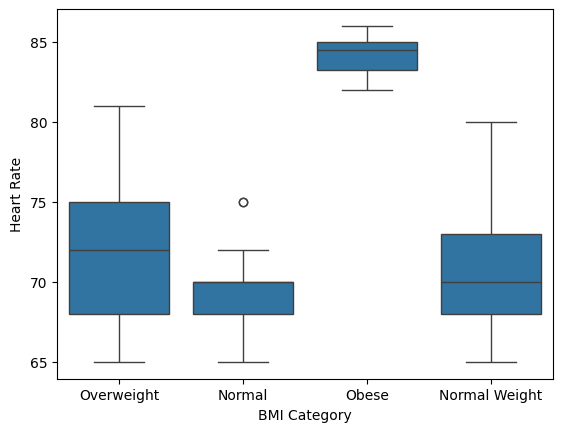

In [259]:
sns.boxplot(x='BMI Category', y='Heart Rate', data=df)

<Axes: xlabel='BMI Category', ylabel='Daily Steps'>

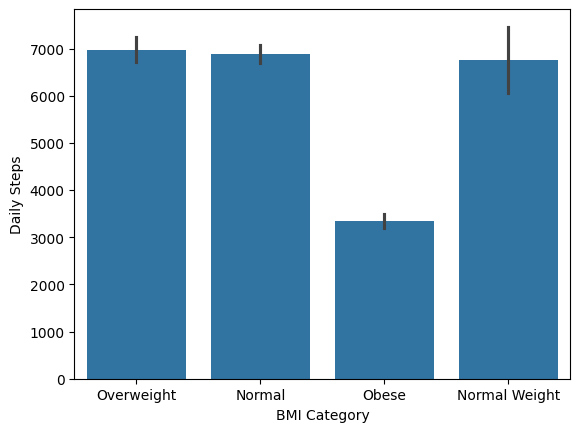

In [260]:
sns.barplot(x='BMI Category',y='Daily Steps',data=df)

Com base na análise dos gráficos, concluiu-se que indivíduos que dormem menos, apresentam pior qualidade de sono, níveis mais altos de estresse, menor quantidade de passos diários e maior frequência cardíaca média têm maior probabilidade de estarem com sobrepeso ou obesidade.

In [261]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


Ao realizar a contagem dos registros do atributo de classificação de peso (BMI Category), foram identificados dois problemas. O primeiro é que, para utilizar algoritmos de machine learning, é necessário transformar variáveis categóricas de texto (Normal Weight, Normal, Overweight e Obese) em valores numéricos correspondentes (0, 1, 2 e 3, respectivamente). Essa transformação foi realizada no código a seguir.

In [262]:
df['BMI Category'] = df['BMI Category'].replace({
    'Normal Weight': 0,
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}).astype(int)

/tmp/ipython-input-1520698907.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BMI Category'] = df['BMI Category'].replace({


O segundo problema identificado é o desbalanceamento das classes. As categorias Normal Weight e Overweight possuem um número de registros muito maior do que as categorias Normal e Obese, que apresentam poucos exemplos. Esse desbalanceamento pode prejudicar a construção do modelo, já que o algoritmo pode acabar ignorando ou subestimando as classes minoritárias.

Como mostrado no código abaixo, a variável BMI Category foi corretamente convertida para o tipo numérico.

In [263]:
df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,3,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,3,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,1,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,1,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,1,120/80,70,8000,NaN


As variáveis preditoras (features) e o alvo (target) são definidas. Em seguida, utilizando a função train_test_split do Scikit-learn, os dados são divididos em conjuntos de treino e teste, na proporção de 70% para treino e 30% para teste.

In [264]:
X = df[['Sleep Duration']]     # variáveis preditora
y = df['BMI Category']       # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

A padronização dos atributos é importante para evitar problemas decorrentes de diferenças de escala entre as variáveis.

In [265]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Dessa forma, o algoritmo de aprendizado de máquina utilizado para a criação do modelo preditivo é a Regressão Logística.

In [266]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Como pode ser observado abaixo, as métricas do modelo criado não foram plenamente satisfatórias. Apesar da acurácia de 74%, que embora razoável não é o principal problema, a matriz de confusão evidencia que o algoritmo não conseguiu classificar corretamente os exemplos das classes '0' e '3', resultando em acertos, F1-score e recall zerados para essas categorias. Medidas serão adotadas para corrigir essas imprecisões e melhorar o desempenho do modelo.


In [267]:
y_pred = model.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.7433628318584071

Matriz de confusão:
 [[ 0  3  0  0]
 [ 0 49 13  0]
 [ 0 11 35  0]
 [ 0  1  1  0]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.79      0.78        62
           2       0.71      0.76      0.74        46
           3       0.00      0.00      0.00         2

    accuracy                           0.74       113
   macro avg       0.37      0.39      0.38       113
weighted avg       0.71      0.74      0.73       113



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Em um teste manual do modelo, observou-se que ele apresenta dificuldades para prever corretamente valores próximos aos limites superior e inferior das categorias.

In [268]:
tempo_sono = np.array([[4]])
tempo_sono_scaled = scaler.transform(tempo_sono)
classe_predita = model.predict(tempo_sono_scaled)[0]

# Dicionário para traduzir de volta
map_inv = {0: 'normal weight', 1: 'normal', 2: 'overweight', 3: 'obese'}

print("Predição para 4h de sono:", map_inv[classe_predita])


Predição para 4h de sono: overweight


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


O modelo será refeito utilizando um maior número de variáveis preditoras relevantes, com o objetivo de aumentar a precisão e corrigir os problemas decorrentes do desbalanceamento das classes.

In [269]:
X = df[['Sleep Duration', 'Quality of Sleep','Stress Level','Heart Rate']]     # variáveis preditora
y = df['BMI Category']       # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [270]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Além disso, o algoritmo de aprendizado de máquina foi alterado: anteriormente utilizava-se a Regressão Logística, e agora emprega-se o Random Forest. Com o ajuste class_weight='balanced', espera-se que o modelo alcance um melhor balanceamento entre as classes.

In [271]:
model_01 = RandomForestClassifier(class_weight='balanced', random_state=42)
model_01.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Dessa forma, a análise dos parâmetros apresentados permite concluir que o modelo foi construído com sucesso, superando as limitações da versão anterior. Com uma acurácia de 97% e desempenho adequado em todas as classes, o modelo agora consegue realizar previsões mesmo nos limites superior e inferior das categorias.

In [272]:
y_pred = model_01.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.9734513274336283

Matriz de confusão:
 [[ 2  0  1  0]
 [ 0 62  0  0]
 [ 0  0 44  2]
 [ 0  0  0  2]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00        62
           2       0.98      0.96      0.97        46
           3       0.50      1.00      0.67         2

    accuracy                           0.97       113
   macro avg       0.87      0.91      0.86       113
weighted avg       0.98      0.97      0.98       113



In [273]:
tempo_sono = np.array([[5,4,8,85]])
tempo_sono_scaled = scaler.transform(tempo_sono)
classe_predita = model_01.predict(tempo_sono_scaled)[0]

# Dicionário para traduzir de volta
map_inv = {0: 'normal weight', 1: 'normal', 2: 'overweight', 3: 'obese'}

print("Predição para 4h de sono, Qualidade do sono 3, Nível de Estresse 8 e Frequência Cardiaca 85 :", map_inv[classe_predita])

Predição para 4h de sono, Qualidade do sono 3, Nível de Estresse 8 e Frequência Cardiaca 85 : obese


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
